# Standard Autoencoder: 64D Latent Space

**Minimal Training Notebook - Updated for Modular Structure**

- **64D Latent**: Standard latent representation
- **Affine Invariant**: Spatial transformation robustness
- **Cloud Ready**: CUDA/CPU optimization
- **Explicit Imports**: Clear module references (standard_64d_autoencoder, affine_autoencoder_shared)

In [1]:
import torch
# Explicit imports from modular structure
import standard_64d_autoencoder as std64d
import affine_autoencoder_shared as shared

# 🚀 CONFIG
CONFIG = {
    'latent_dim': 64, 'epochs': 50, 'learning_rate': 1e-3,
    'batch_size_train': 256, 'batch_size_test': 128,
    'alpha': 1.0, 'beta': 0.5, 'gamma': 0.1,
    'force_cuda': True, 'mixed_precision': True, 'gradient_clip': 1.0,
    'pin_memory': True, 'num_workers': 4, 'weight_decay': 1e-5,
    'lr_scheduler': True, 'early_stopping': True, 'patience': 10,
    'data_dir': '../data', 'save_dir': './', 'checkpoint_freq': 10
}

In [2]:
# 🌩️ SETUP - Using shared utilities with explicit module reference
device = shared.get_cloud_device(CONFIG)
scaler = torch.cuda.amp.GradScaler() if CONFIG['mixed_precision'] and device.type == 'cuda' else None
train_loader, test_loader = shared.get_cloud_mnist_loaders(**{k: v for k, v in CONFIG.items() if k in ['batch_size_train', 'batch_size_test', 'data_dir', 'pin_memory', 'num_workers']})

🍎 Apple MPS device
📊 Train batches: 235, Test batches: 79


In [3]:
# 🏗️ MODEL - Using standard_64d_autoencoder module explicitly
model = std64d.AffineInvariantAutoEncoder(latent_dim=CONFIG['latent_dim']).to(device)

In [ ]:
# 📂 OPTIONAL: LOAD EXISTING MODEL (comment out to train new)
# shared.list_saved_models()  # List available models (from affine_autoencoder_shared)
# model, CONFIG, device = shared.load_model_cloud("autoencoder_model_YYYYMMDD_HHMMSS.pth")
# Note: Use shared.* functions from affine_autoencoder_shared module

In [4]:
# 🚀 TRAIN - Using standard affine invariant training from standard_64d_autoencoder
losses_dict = std64d.train_affine_invariant_autoencoder(model, train_loader, epochs=CONFIG['epochs'], 
                                                       learning_rate=CONFIG['learning_rate'], device=device)

TypeError: train_affine_invariant_autoencoder() got an unexpected keyword argument 'learning_rate'

In [ ]:
# 🔄 RELOAD MODULES (run this if you get unpacking errors)
import importlib
importlib.reload(std64d)
importlib.reload(shared)
# Re-import with explicit module names
import standard_64d_autoencoder as std64d
import affine_autoencoder_shared as shared

KeyError: 'total_losses'

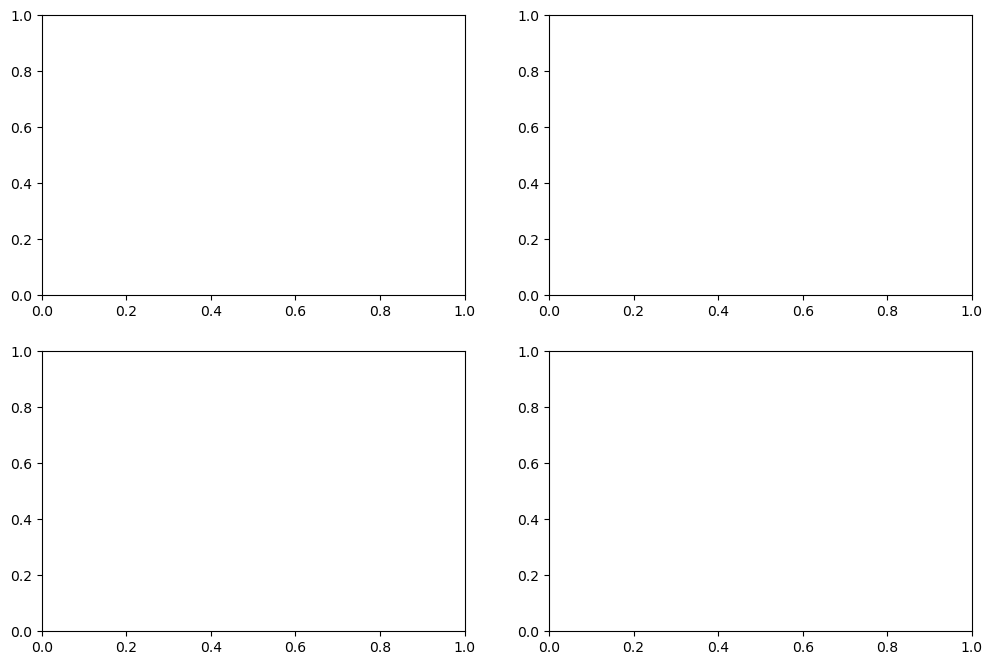

In [6]:
# 📈 VISUALIZE - Using explicit module references
shared.plot_simplified_training_progress(losses_dict)
std64d.visualize_64d_latent_space(model, test_loader, device)

🚀 Starting Comprehensive Visualization Suite

1️⃣ Random Reconstructions...


/Users/pmaksym/Library/CloudStorage/Box-Box/Code/adversAE/adversae/vae_training/affine/affine_autoencoder.py:1546: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


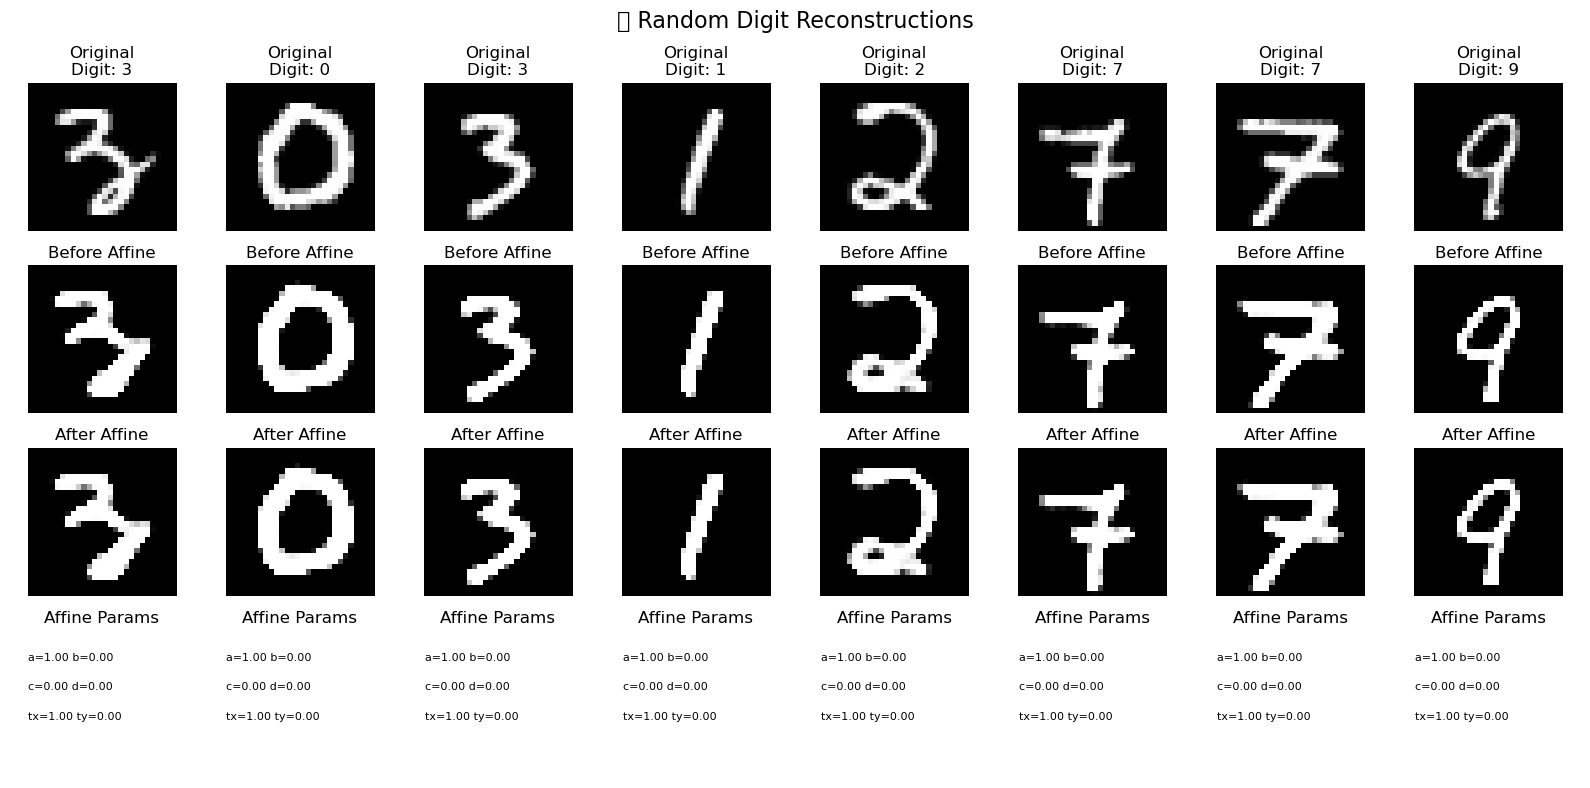

🎯 Reconstructed 8 random samples

2️⃣ Latent Space Grid Scan...
🔍 Scanning standard latent space: 64D

2️⃣ Latent Space Grid Scan...
🔍 Scanning standard latent space: 64D


/Users/pmaksym/Library/CloudStorage/Box-Box/Code/adversAE/adversae/vae_training/affine/affine_autoencoder.py:1616: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


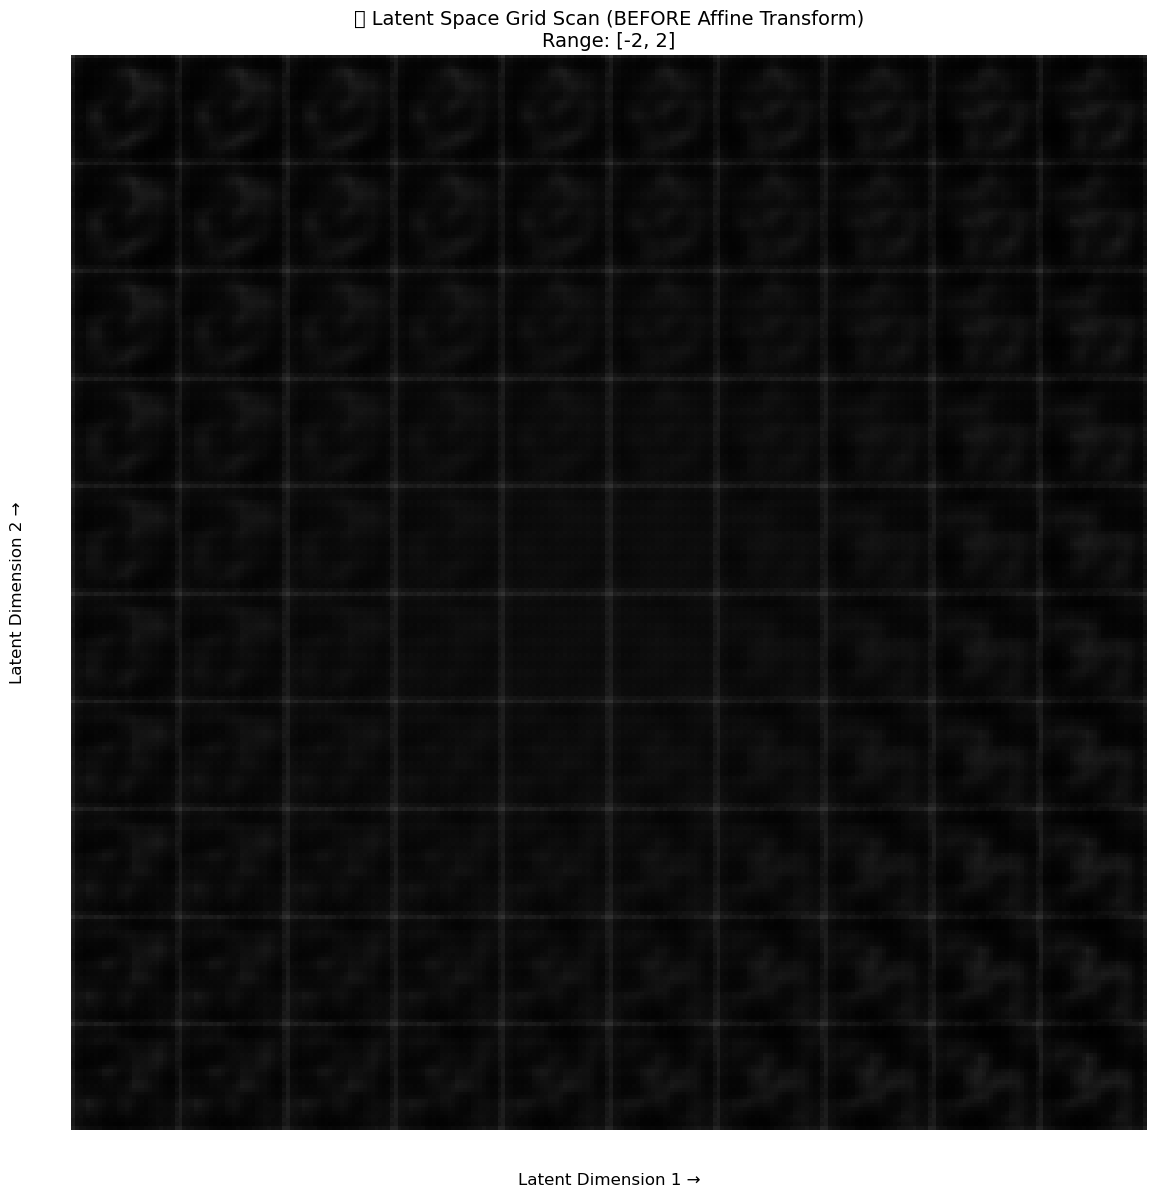

📊 Generated 10×10 = 100 images from latent grid

3️⃣ Affine Perturbation Analysis...


/Users/pmaksym/Library/CloudStorage/Box-Box/Code/adversAE/adversae/vae_training/affine/affine_autoencoder.py:1676: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


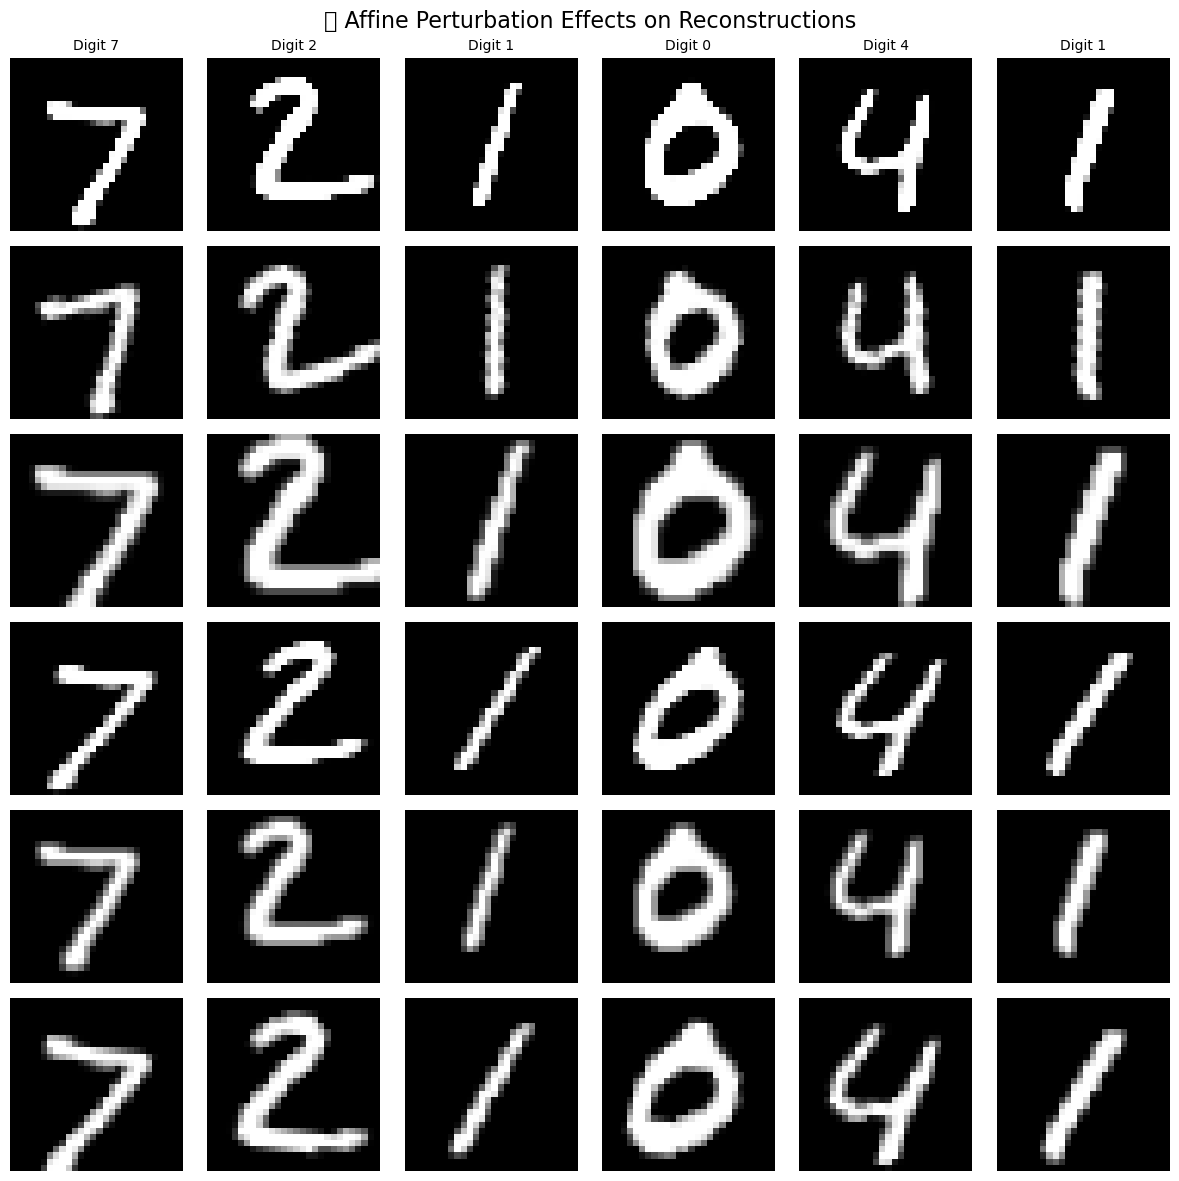

🎭 Applied 6 different affine transformations to 6 samples

✅ Comprehensive visualization complete!

✅ Comprehensive visualization complete!


In [7]:
# 🎨 COMPREHENSIVE VISUALIZATIONS - Using standard_64d_autoencoder module
std64d.visualize_standard_autoencoder_results(model, test_loader, device)

In [ ]:
# 💾 SAVE - Using shared save functionality from affine_autoencoder_shared
model_file, metadata_file = shared.save_model_cloud(model, CONFIG, losses_dict, device)

In [ ]:
# 💾 ALTERNATIVE: Save for Visualization (includes all data needed for viz)
viz_filename = shared.save_model_for_viz(
    model,
    model_type="standard", 
    config=CONFIG,
    losses=losses_dict,
    name="64d_affine"  # Custom name for easy identification
)

In [ ]:
# 📁 LOAD MODEL FOR VISUALIZATION  
# Run this cell to load a previously saved model instead of training from scratch

# Option 1: Load specific model by filename
# loaded_model, viz_data = shared.load_model_for_viz("standard_64d_affine_20250720_123456.pth",
#                                                    std64d.AffineInvariantAutoEncoder, device)

# Option 2: Quick load most recent model
# loaded_model, viz_data = shared.quick_load_viz(std64d.AffineInvariantAutoEncoder,
#                                                model_type="standard", name="64d_affine", device=device)

# After loading, you can access:
# - loaded_model: The trained model ready for inference
# - viz_data['config']: Original training configuration
# - viz_data['losses']: Training loss history

print("💡 Uncomment the lines above to load a saved model for visualization")